## **Netflix Data: Analysis and Preprocessing**

Author: Victor Yaotse Agbadan

Date: June 16, 2024

![Image](netflix.png)

#### **Table Of Contents**

1. Executive Summary
2. Introduction
3. Data Collection
4. Methodology
5. Data Cleaning
6. Visualizations
7. Results

>### **Executive Summary**
This project presents an anlysis on Netflix data to understand the how the content has been added to the platform across time and space. We start by collecting the data, cleaning it and analyze it by performing an exploratory data analysis (EDA).

>### **Introduction**
**Background**

Netflix is an American subscription video on-demand over-the-top streaming service. The service primarily distributes original and acquired films and television shows from various genres, and it is available internationally in multiple languages. It's been founded on August 29, 1997 by Reed Hastings and Marc Randolph and has its quarter in Los Gatos, California, United States.

**Objectives**
The primary objective of this analysis is to get knowledge about which from which parts of the world and when contents are mostly added to the platform.

**Scope**
This analysis focuses on the data from 2008 to 2024.

>### **Data Collection**

**Data Source**: the dataset was obtained from Kaggle, https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows

**Data Description**

The dataset contains the following information about each entry in the dataset:

* show_id: Unique id of each show
* type: Type of the show, movie or TV show
* title: Show title
* director: Director of the show
* cast: Principal actors on the show
* country: Country of production
* date_added: Date the show has been uploaded to netflix
* release_year: Original release year
* rating: Show rating
* duration: Duration of the show in minutes for movies and season for tv shows
* listed_in: References to the show
* description: Unique description of the show

**Tools and Methodology:** Python, Pandas, Matplotlib, Numpy, JupyterNotebook

In [226]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

>### **Data Cleaning**

In [227]:
# import dataset
df = pd.read_csv('netflix_titles.csv', encoding='latin1')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


New 'unnamed' columns have been created after importing the dataset using the 'Latin' encoding, so we will drop those columns as they contain no useful information

In [228]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [229]:
# Get the index of the first unnamed column
df.columns.get_loc("Unnamed: 12")

12

In [230]:
# Drop cols form index 12
df = df.drop(columns=df.columns[12:])
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [231]:
print("Shape: ", df.shape)
print(df.info())

Shape:  (8809, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


In [232]:
# Get the number of nan values in each column
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [233]:
# To fill nan information for important columns
df['director'] = df.director.fillna('No director')
df['cast'] = df.cast.fillna('No info')
df['country'] = df.country.fillna('country')
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [234]:
# drop the remaining missing values
df.dropna(inplace=True)
df.shape

(8792, 12)

In [235]:
print("Number of movies: ", sum(df.type=="Movie"))
print("Number of movies: ", sum(df.type=="TV Show"))

Number of movies:  6127
Number of movies:  2665


In [236]:
movie_tv = df.groupby(['type']).size().reset_index(name='count')
movie_tv

,type,count
0,Movie,6127
1,TV Show,2665


In [237]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No info,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No director,No info,country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [238]:
# Check if there are any duplicates
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  0


In [239]:
# Convert date from object type to datetime type
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed') # the mixed format is used to accept all the formats present in the df
df['date_added'].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [240]:
# Extract month and year
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
print(df[['month_added', 'year_added']].head())

  month_added  year_added
0   September        2021
1   September        2021
2   September        2021
3   September        2021
4   September        2021


In [241]:
print(df['year_added'].min())
print(df['year_added'].max())

2008
2024


The dataset contains information about movies and shows from 2008 to 2024.

In [242]:
# Number of unique values in each column
df.nunique()

show_id         8792
type               2
title           8789
director        4528
cast            7681
country          749
date_added      1714
release_year      75
rating            15
duration         220
listed_in        515
description     8760
month_added       12
year_added        15
dtype: int64

> ### **Visualizations**

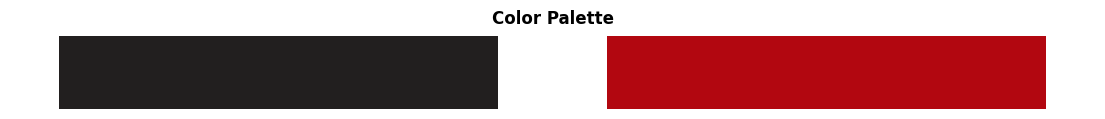

In [243]:
# Create a color palette to use in our visualizations
color_palette = ['#221f1f', '#b20710']

# Display the color palette
fig, ax = plt.subplots(figsize=(14,1))
ax.axis('off')

for i, color in enumerate(color_palette):
    ax.bar(i, 1, color=color)

plt.title('Color Palette', fontweight='bold')
plt.show()

In [244]:
movie_tv

,type,count
0,Movie,6127
1,TV Show,2665


In [245]:
# Determine proportion of movies and tv shows
type_percentages = round(movie_tv['count']/(movie_tv['count'].sum())*100, 2)
type_percentages

0    69.69
1    30.31
Name: count, dtype: float64

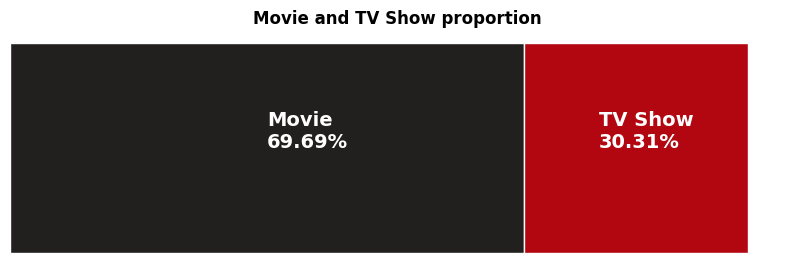

In [246]:
# Display proportion of movies and tv shows in the dataset using horizontal bar
colors = [color_palette[0], color_palette[1]]
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

ax.barh([''], [type_percentages[0]], color=colors[0], edgecolor='white', label='Movie')
ax.barh([''], [type_percentages[1]], color=colors[1], left=[type_percentages[0]], edgecolor='white', label='TV Show')

plt.title('Movie and TV Show proportion', fontweight='bold')
ax.text(type_percentages[0]/2, 0, f'Movie\n{type_percentages[0]}%', fontsize=14, color='white', fontweight='bold')
ax.text(type_percentages[0]+type_percentages[1]/3, 0, f'TV Show\n{type_percentages[1]}%', fontsize=14, color='white', fontweight='bold')

plt.show()

'Movies' represent about 69.69% percent of all the shows added to netflix since 2008 and 'TV Shows' represent 30.31%

In [247]:
directors = df.groupby(['director']).size().reset_index(name='count')
directors

,director,count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4523,Ãagan Irmak,1
4524,Ãsold UggadÃ³ttir,1
4525,Ãskar ThÃ³r Axelsson,1
4526,Ãmer Faruk Sorak,2


In [248]:
directors['count'].max()

2621

In [249]:
directors.loc[directors['count']==2621]

,director,count
3049,No director,2621


In [250]:
# Get the top 10 countries with most of movies and tv shows added to netflix
filtered_df = df[df['country'] != 'country']
country_counts= filtered_df['country'].value_counts().head(10)
country_counts

country
United States     2810
India              972
United Kingdom     418
Japan              243
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

United States being Netflix headquarters has obviously the highest number of movies and tv shows, 2810. It is followed by India with 972 shows added to netflix. The gap between both is very significant though, in third place comes United Kingdom with 418 shows added to the platform.

In [251]:
top3_countries = country_counts.index[:3]
top3_countries

Index(['United States', 'India', 'United Kingdom'], dtype='object', name='country')

In [252]:
top3_counts = country_counts.values[:3]
top3_counts

array([2810,  972,  418], dtype=int64)

In [253]:
top_countries = pd.DataFrame(country_counts).reset_index()
top_countries

,country,count
0,United States,2810
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,200
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


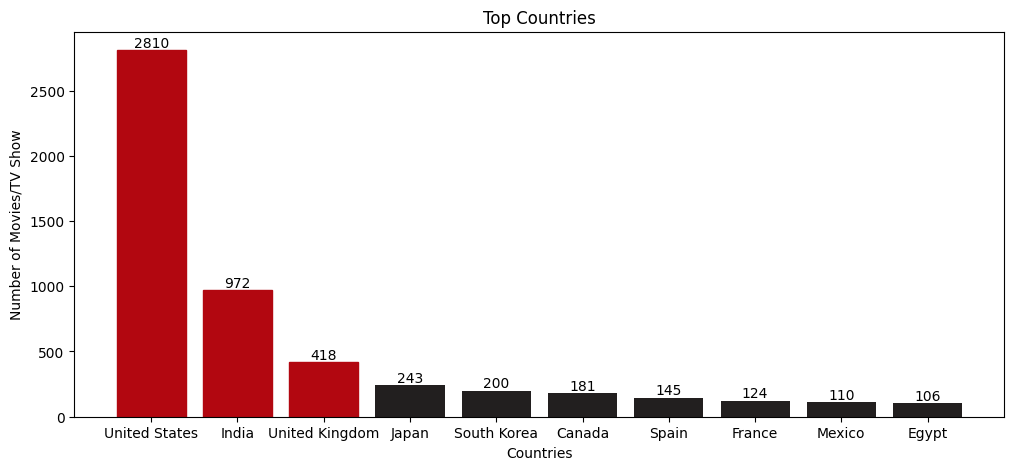

In [254]:
plt.figure(figsize=(12,5))
bars = plt.bar(top_countries['country'], top_countries['count'], color=color_palette[0])

# Highlight top three countries
for country, count, bar in zip(top3_countries, top3_counts, bars):
    bar.set_color(color_palette[1])


# display values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, # x-coordinate
        height, # y-coordinate
        f'{height}', # text
        ha = 'center',
        va = 'bottom'
    )

plt.xlabel('Countries')
plt.ylabel('Number of Movies/TV Show')
plt.title('Top Countries')
plt.show()

 **Plot proportion of movies and tv shows per country**

In [255]:
# Get the number of movies and tv shows per country
country_movies = filtered_df[filtered_df['type'] == 'Movie']['country'].value_counts()
country_tv_shows =  filtered_df[filtered_df['type'] == 'TV Show']['country'].value_counts()

# Convert this to a data frame
movie_tv_counts = pd.DataFrame({
    'movie': country_movies,
    'tv show': country_tv_shows
}).fillna(0)

movie_tv_counts['total_counts'] = movie_tv_counts.sum(axis=1)
movie_tv_counts.reset_index()

,country,movie,tv show,total_counts
0,", France, Algeria",1.0,0.0,1.0
1,", South Korea",0.0,1.0,1.0
2,Argentina,38.0,18.0,56.0
3,"Argentina, Brazil, France, Poland, Germany, De...",1.0,0.0,1.0
4,"Argentina, Chile",2.0,0.0,2.0
...,...,...,...,...
743,Venezuela,1.0,0.0,1.0
744,"Venezuela, Colombia",1.0,0.0,1.0
745,Vietnam,7.0,0.0,7.0
746,West Germany,1.0,0.0,1.0


In [256]:
movie_tv_counts_sorted = movie_tv_counts.sort_values(by='total_counts', ascending=False).head(10).reset_index()
movie_tv_counts_sorted['movie_prop'] = round(movie_tv_counts_sorted['movie'] / movie_tv_counts_sorted['total_counts']*100, 2)
movie_tv_counts_sorted['tv_show_prop'] = round(movie_tv_counts_sorted['tv show'] / movie_tv_counts_sorted['total_counts']*100, 2)
movie_tv_counts_sorted = movie_tv_counts_sorted.sort_values(by='movie_prop', ascending=False)
movie_tv_counts_sorted

,country,movie,tv show,total_counts,movie_prop,tv_show_prop
1,India,893.0,79.0,972.0,91.87,8.13
9,Egypt,92.0,14.0,106.0,86.79,13.21
0,United States,2056.0,754.0,2810.0,73.17,26.83
5,Canada,122.0,59.0,181.0,67.40,32.60
6,Spain,97.0,48.0,145.0,66.90,33.10
8,Mexico,70.0,40.0,110.0,63.64,36.36
7,France,75.0,49.0,124.0,60.48,39.52
2,United Kingdom,206.0,212.0,418.0,49.28,50.72
3,Japan,76.0,167.0,243.0,31.28,68.72
4,South Korea,41.0,159.0,200.0,20.50,79.50


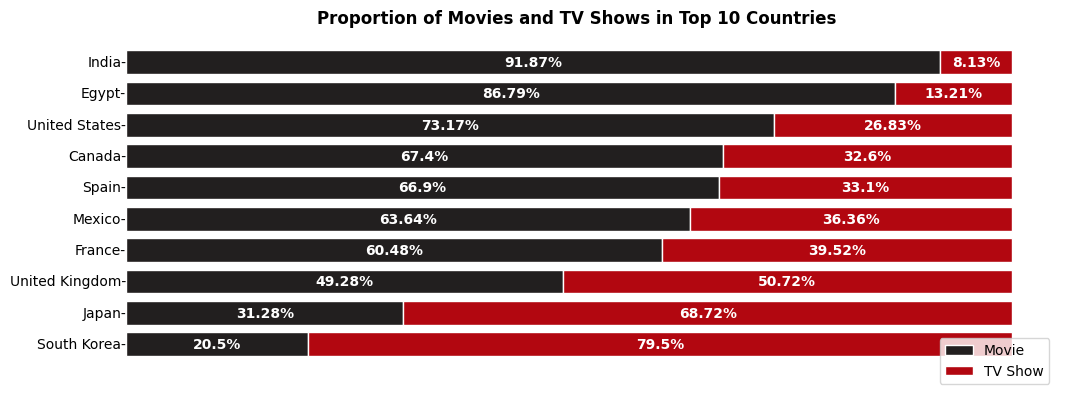

In [257]:
fig, ax = plt.subplots(len(movie_tv_counts_sorted), 1, figsize=(12, 4))


for i in range(len(movie_tv_counts_sorted)):
    ax[i].barh([''], [movie_tv_counts_sorted['movie_prop'].iloc[i]], color=colors[0], edgecolor='white', label='Movie')
    ax[i].barh([''], [movie_tv_counts_sorted['tv_show_prop'].iloc[i]], color=colors[1], left=[movie_tv_counts_sorted['movie_prop'].iloc[i]], edgecolor='white', label='TV Show')
    ax[i].axis('off')
    ax[i].text(movie_tv_counts_sorted['movie_prop'].iloc[i]/2, 0, f'{movie_tv_counts_sorted['movie_prop'].iloc[i]}%', fontweight='bold', color='white', ha='center', va='center')
    ax[i].text(movie_tv_counts_sorted['movie_prop'].iloc[i] + movie_tv_counts_sorted['tv_show_prop'].iloc[i]/2, 0, f'{movie_tv_counts_sorted['tv_show_prop'].iloc[i]}%', fontweight='bold', color='white', ha='center', va='center')
    ax[i].text(0, 0, f'{movie_tv_counts_sorted['country'].iloc[i]}-', ha='right', va='center')

#plt.title('Proportion of Movies and TV Shows fo top 10 Countries', fontweight='bold')
fig.suptitle('Proportion of Movies and TV Shows in Top 10 Countries', fontweight='bold')
plt.legend()
plt.show()

In the top 10 countries with highest number of shows uploaded to netflix, India has the highest proportion of 'Movies' with 91.87%, followed by Egypt 86.79% and third comes United States with 73.17%. Regarding the 'TV Shows', South Korea has the highest proportion 79.5%, followed by Japan with 68.72% and then United Kingdom, 50.72%.

In [258]:
# Get the number of movies and tv shows added per month
movie_monthly_added = filtered_df[filtered_df['type'] == 'Movie']['month_added'].value_counts()
tvshow_monthly_added = filtered_df[filtered_df['type'] == 'TV Show']['month_added'].value_counts()

monthly_add = pd.DataFrame({
    'movie': movie_monthly_added,
    'tv_show': tvshow_monthly_added
}).reset_index()

monthly_add['total_monthly_added'] = monthly_add.movie + monthly_add.tv_show
monthly_add

,month_added,movie,tv_show,total_monthly_added
0,April,512,183,695
1,August,471,195,666
2,December,518,240,758
3,February,372,168,540
4,January,527,174,701
5,July,490,218,708
6,June,443,190,633
7,March,502,183,685
8,May,392,153,545
9,November,483,188,671


In [259]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_add['month_added'] = pd.Categorical(monthly_add['month_added'], categories=new_order, ordered=True)
monthly_add = monthly_add.sort_values(by='month_added')
monthly_add

,month_added,movie,tv_show,total_monthly_added
4,January,527,174,701
3,February,372,168,540
7,March,502,183,685
0,April,512,183,695
8,May,392,153,545
6,June,443,190,633
5,July,490,218,708
1,August,471,195,666
11,September,460,200,660
10,October,518,183,701


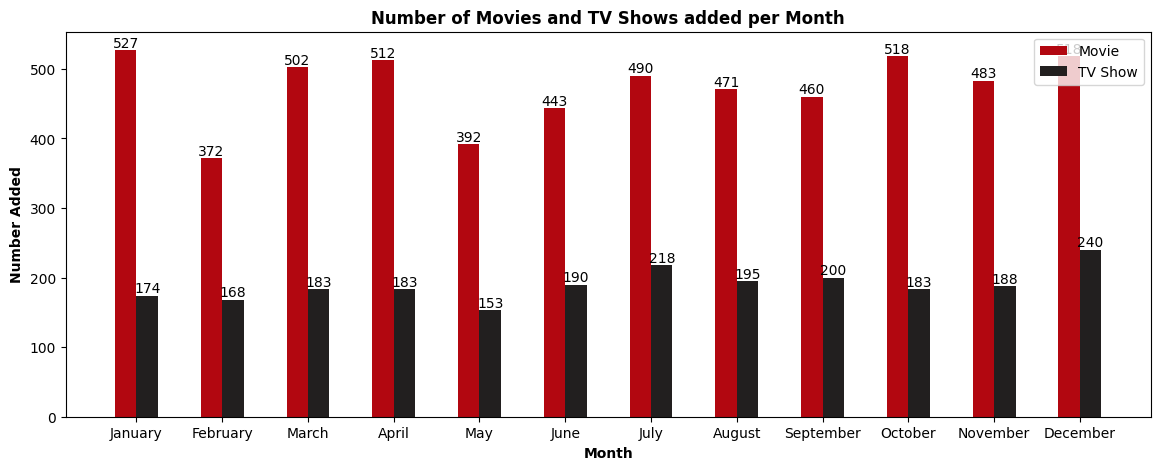

In [260]:
# Plot the number of movies and tv shows added per month
fig, ax = plt.subplots(figsize=(14, 5))

# Define the x-positions of and bar width
r = np.arange(len(monthly_add['month_added']))
bar_width = 0.25

# Plot the bars
bars1 = ax.bar(r, monthly_add['movie'], width=bar_width, color=color_palette[1], label='Movie')
bars2 = ax.bar(r + bar_width, monthly_add['tv_show'], width=bar_width, color=color_palette[0], label='TV Show')

# Add labels
ax.set_xlabel('Month', fontweight='bold')
ax.set_ylabel('Number Added', fontweight='bold')
ax.set_title('Number of Movies and TV Shows added per Month', fontweight='bold')
ax.set_xticks(r + bar_width/2)
ax.set_xticklabels(monthly_add['month_added'])

# Display values at top of the bars
for bar in list(bars1) + list(bars2):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{height}',
        ha='center',
        va='bottom'
    )

plt.legend()
plt.show()

In [261]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No info,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021


See the evolution over time of the number of movies and tv shows added to the platform

In [262]:

movies_over_years = df[df['type'] == 'Movie']['year_added'].value_counts()
tvshow_over_years = df[df['type'] == 'TV Show']['year_added'].value_counts()

over_years = pd.DataFrame({
    'movie': movies_over_years,
    'tv_show': tvshow_over_years
}).fillna(0).reset_index()

over_years

,year_added,movie,tv_show
0,2008,1,1.0
1,2009,2,0.0
2,2010,1,0.0
3,2011,13,0.0
4,2012,3,0.0
5,2013,6,5.0
6,2014,19,5.0
7,2015,56,26.0
8,2016,251,175.0
9,2017,836,349.0


In [263]:
over_years['tv_show'] = over_years['tv_show'].astype(int)
over_years

,year_added,movie,tv_show
0,2008,1,1
1,2009,2,0
2,2010,1,0
3,2011,13,0
4,2012,3,0
5,2013,6,5
6,2014,19,5
7,2015,56,26
8,2016,251,175
9,2017,836,349


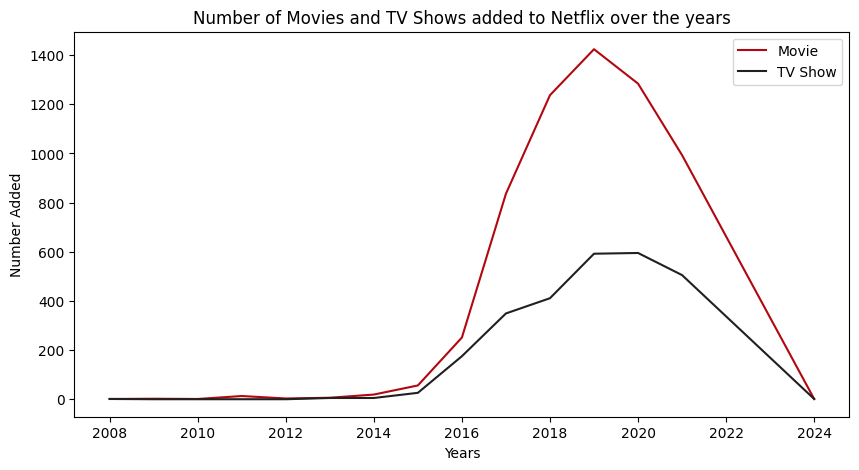

In [264]:
# Plot time series of movie and tv show
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(over_years['year_added'], over_years['movie'], color=color_palette[1], label='Movie')
ax.plot(over_years['year_added'], over_years['tv_show'], color=color_palette[0], label='TV Show')

ax.set_xlabel('Years')
ax.set_ylabel('Number Added')
plt.title('Number of Movies and TV Shows added to Netflix over the years')
plt.legend()

plt.show()

>### **Results**
- The movies uploded to Netflix platform since 2008 represent 69.69% of the total content and the tv shows represent 30.31%
- 2621 movies and tv shows have no mentioned director in the dataset
- The top three countries with most content on the platform are United States, India and United Kingdom. The number of contents uploaded by each of these countries are 2810, 972 and 418 respectively.
- Among the top 10 countries with most content on Netflix, India has the highest proportion of 'Movies' with 91.87%, followed by Egypt 86.79% and third comes United States with 73.17%. Regarding the 'TV Shows', South Korea has the highest proportion 79.5%, followed by Japan with 68.72% and then United Kingdom, 50.72%.
- In each month, the number of movies added to the platform is significantly higer than the number of shows
- The number of contents added considerably increased between 2014 and 2019 but from 2020, it decreased to reach 1 in 2024, though the year is not over yet. 



*Reference:* https://www.kaggle.com/code/s4ndaa/netflix-data-analysis-and-hypothesis-testing
